Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6

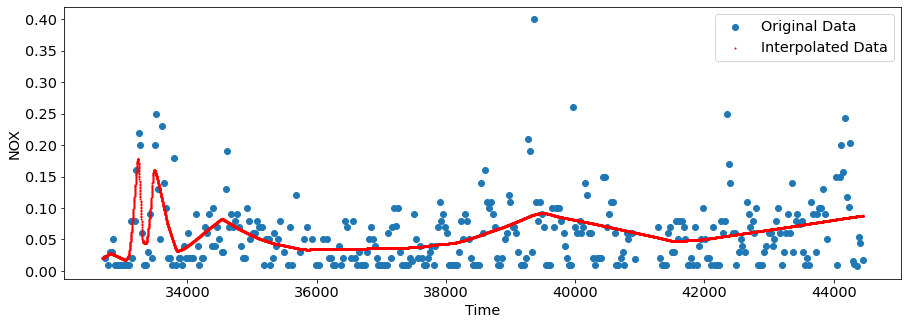

313/313 [==============================] - 0s 356us/step - loss: 1.0276e-16
['loss']


In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('C:/Users/yanzh/Interpolation//NOX/saved_model/my_modelAR03_NOX')
# Check its architecture
model.summary()

df = pd.read_csv("E:/1 My Project/Interpolated data/NOX_data/AR03.csv")
time = df['time'].values
NOX = df['NOX'].values
df

#Transform the normalized scale to real scale
NOX_min = 0.007
NOX_max = 0.4
time_min = 32723.34                
time_max = 44454.35                      

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(NOX_max - NOX_min) + NOX_min

# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, NOX*(NOX_max - NOX_min) + NOX_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('NOX')
plt.legend()
plt.show()

model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)

In [3]:
interpolation = model.predict([0.205324088
,0.234051357
,0.239080761
,0.249480544
,0.254680435
,0.259880327
,0.265165462
,0.270194866
,0.275394757
,0.280594649
,0.28579454
,0.290994432
,0.306508862
,0.701018667
,0.703490747
,0.706133315
,0.708690638
,0.711333206
,0.71389053
,0.716533098
,0.719175666
,0.721732989
,0.724375557
,0.726932881
,0.955216644
,0.957773968
,0.960416536
,0.322108537

])
interpolation

array([[0.11054961],
       [0.08615365],
       [0.08298416],
       [0.07623045],
       [0.07270124],
       [0.06981438],
       [0.06864577],
       [0.06858401],
       [0.06896058],
       [0.06933714],
       [0.0697137 ],
       [0.07009029],
       [0.07080631],
       [0.13588095],
       [0.13424672],
       [0.13249978],
       [0.13080919],
       [0.1290622 ],
       [0.1273717 ],
       [0.12562464],
       [0.12387079],
       [0.12217178],
       [0.12041616],
       [0.1187035 ],
       [0.18561801],
       [0.18683061],
       [0.18808359],
       [0.07152548]], dtype=float32)